### Z-Score
Z-Score = Xi-mean/STD
Z-Score <= 3 then this is not a outlier

### IQR inter quantile range
75%-25%

Q1=25%

Q3=75%

upper_bridge = Q3+(IQR*1.5)

lower_bridge = Q1-(IQR*1.5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.dropna(axis=1,inplace=True)
df.drop(columns=['id'],axis=1,inplace=True)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


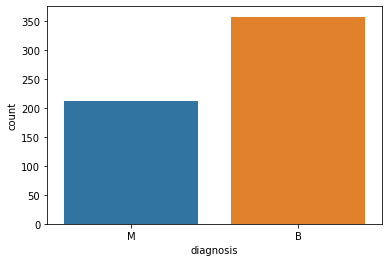

In [5]:
sns.countplot(df['diagnosis'])

## EDA

In [6]:
X=df.iloc[:,1:]
y=df.iloc[:,0]
y = y.map({'B':0,'M':1})

### PairPlot

In [7]:
#sns.pairplot(df,hue="diagnosis")

### histogram

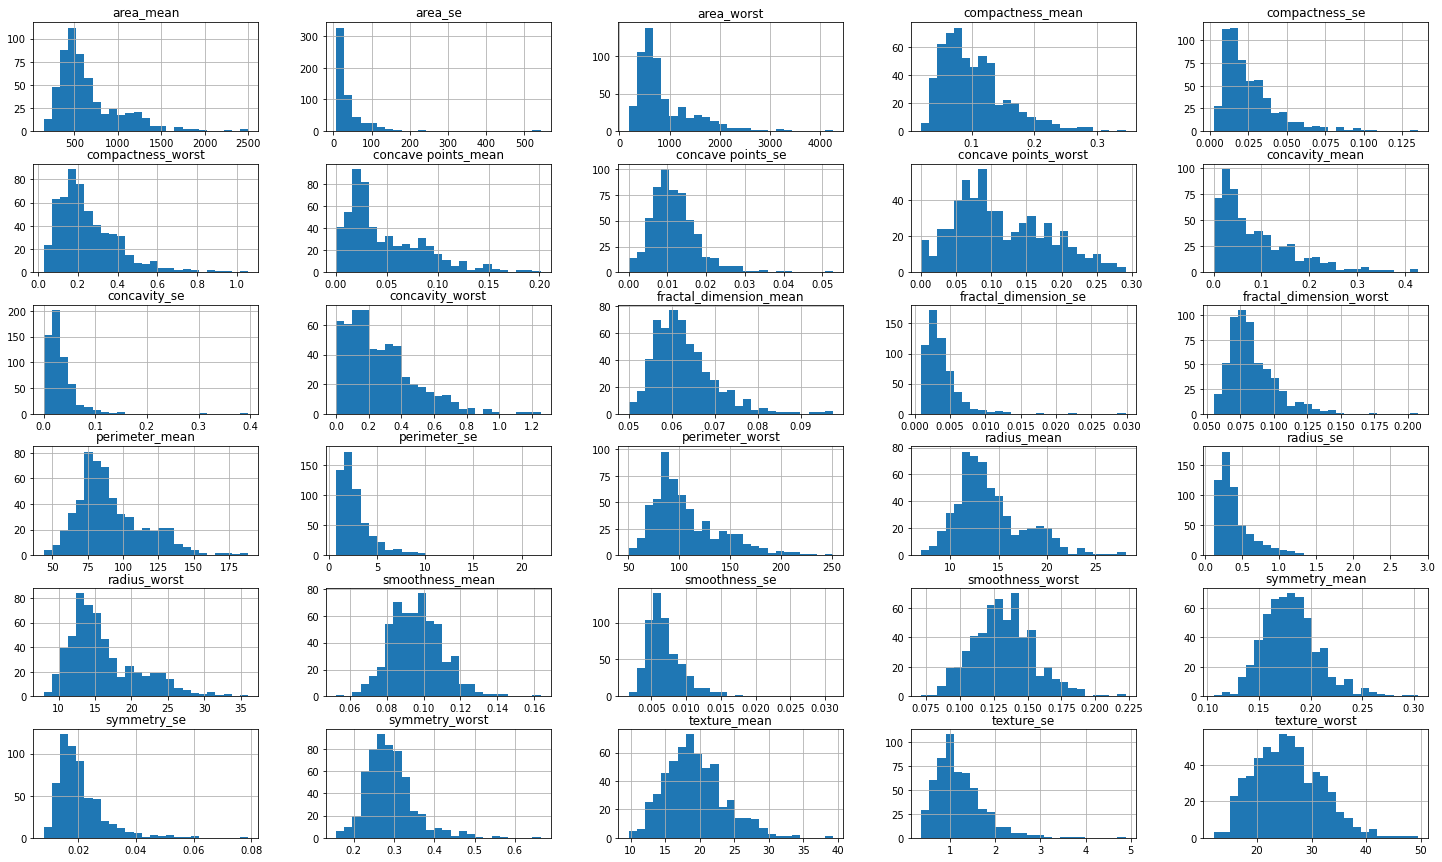

In [8]:
X.hist(bins = 25, figsize = (25,15))
plt.show()

### distplot

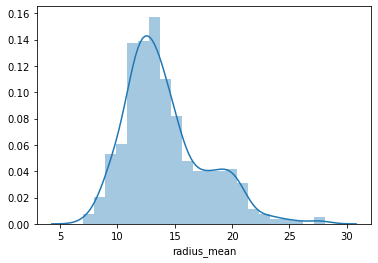

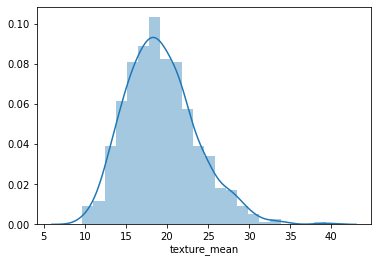

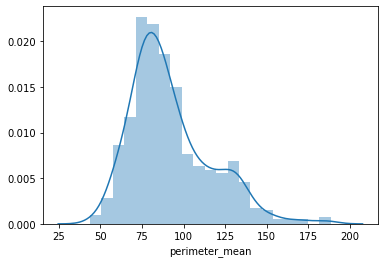

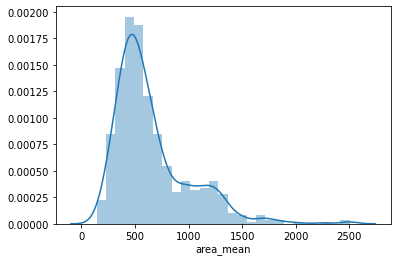

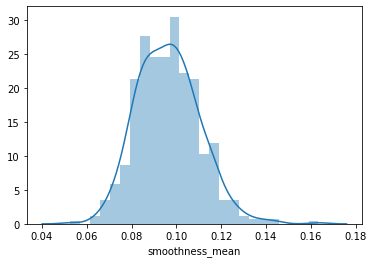

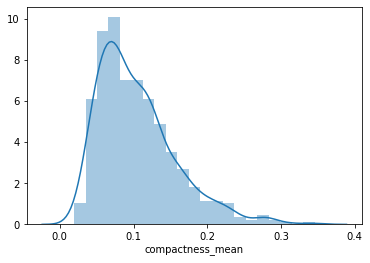

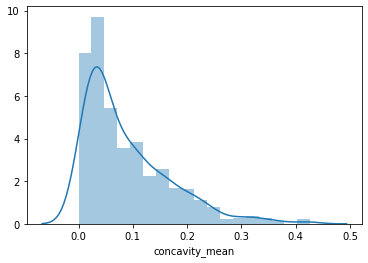

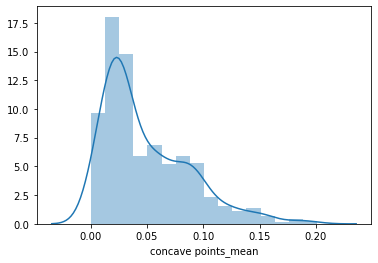

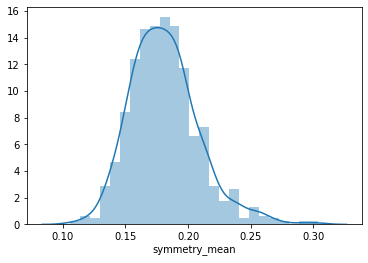

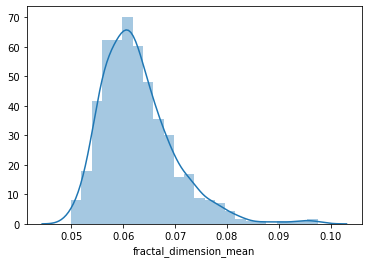

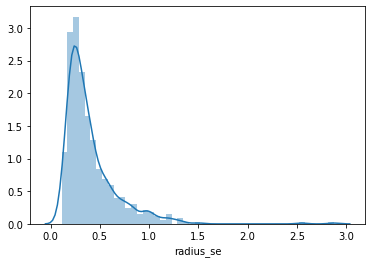

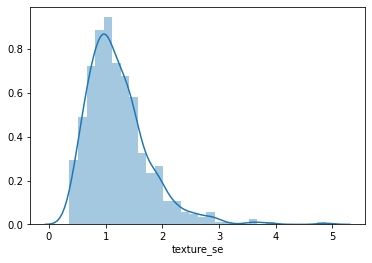

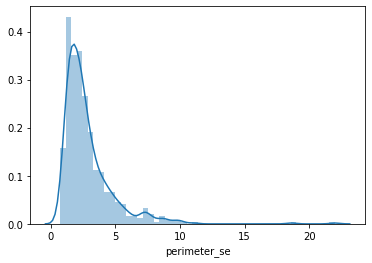

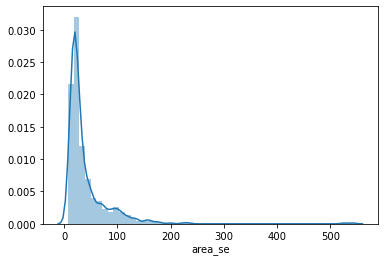

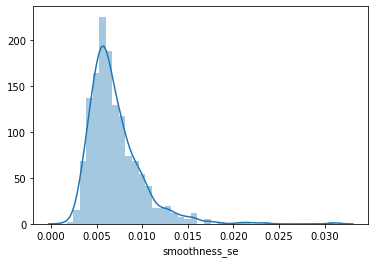

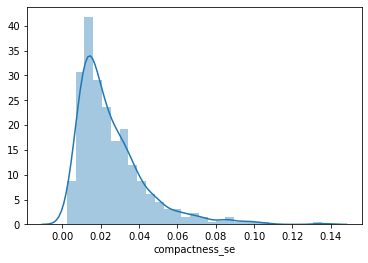

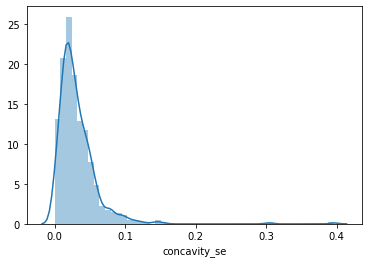

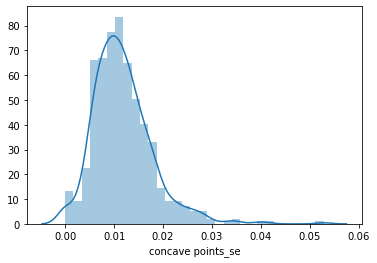

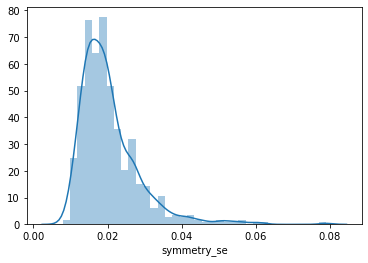

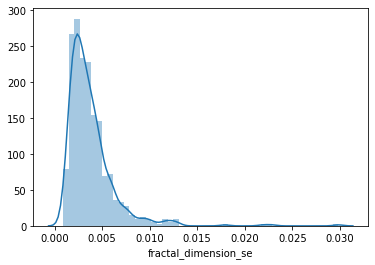

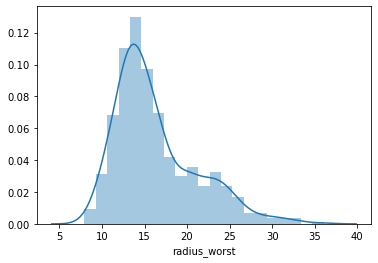

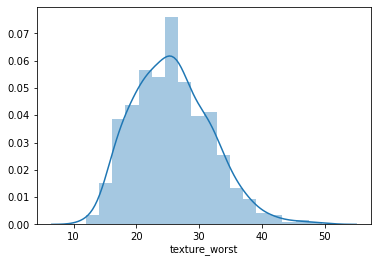

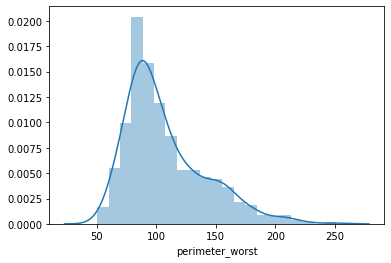

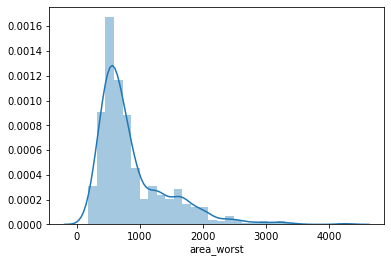

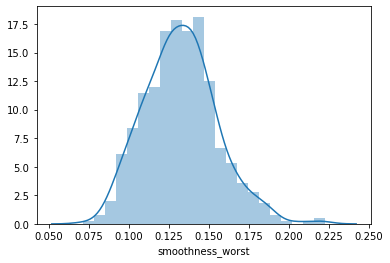

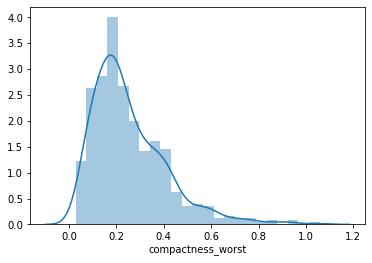

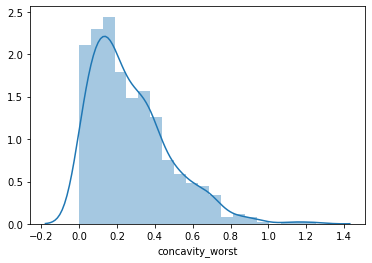

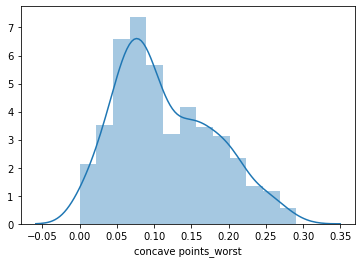

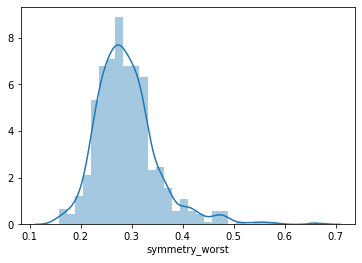

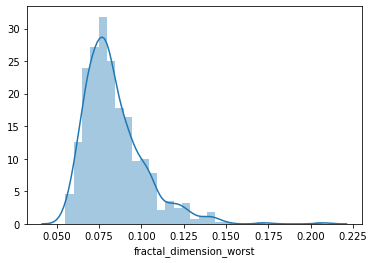

In [9]:
for i in X.columns:
    sns.distplot(X[i])
    plt.show()

### boxplot to check outlier

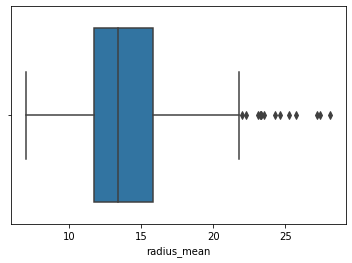

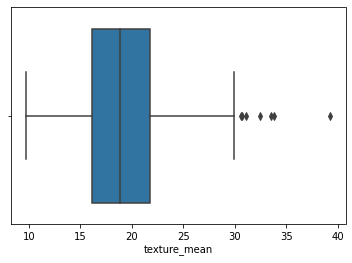

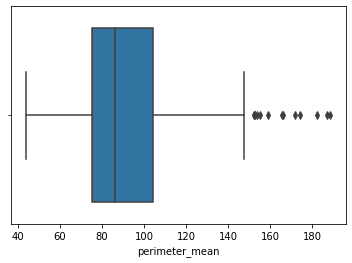

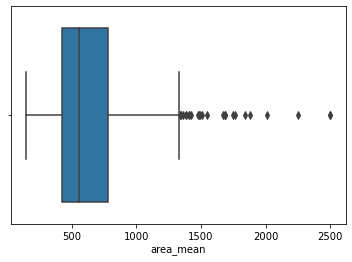

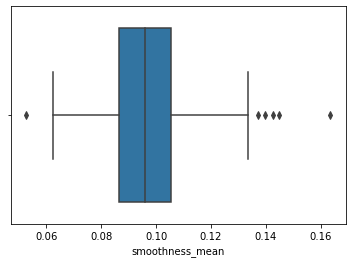

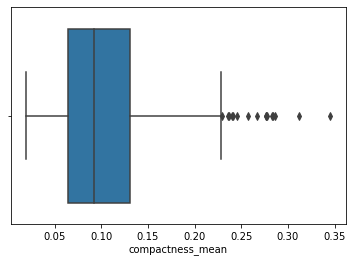

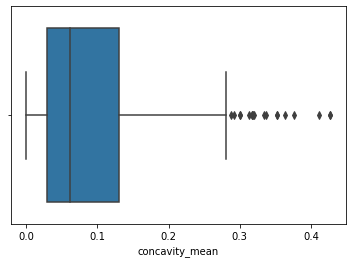

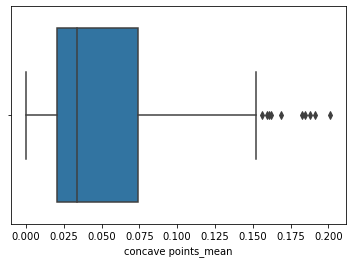

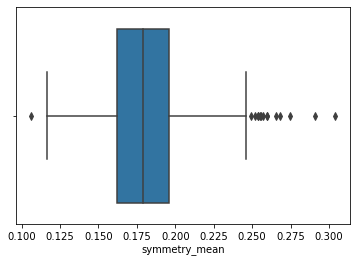

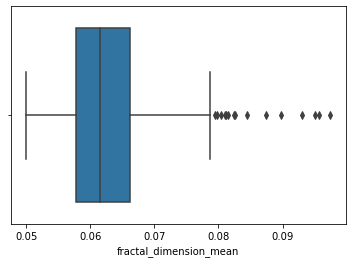

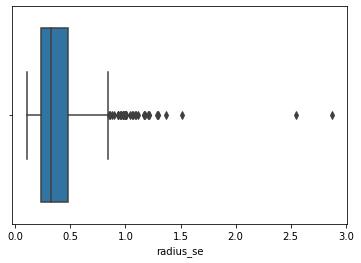

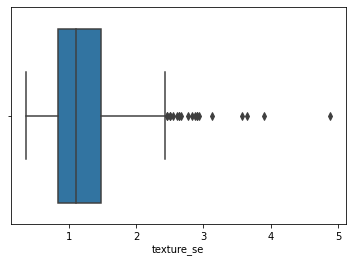

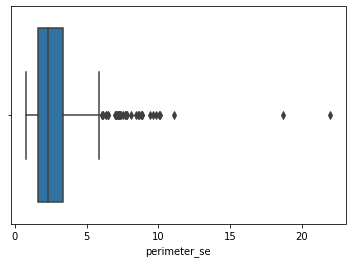

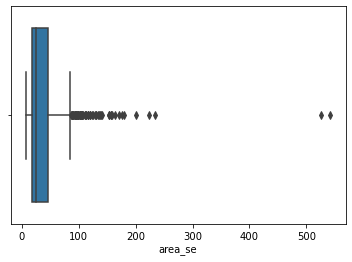

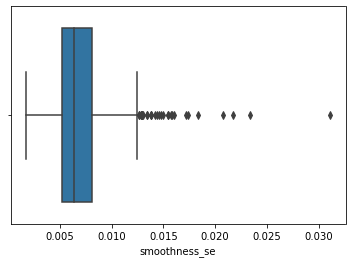

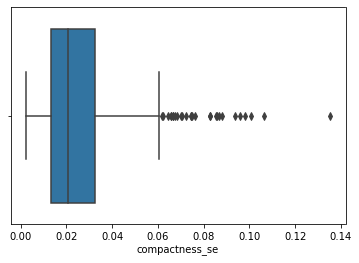

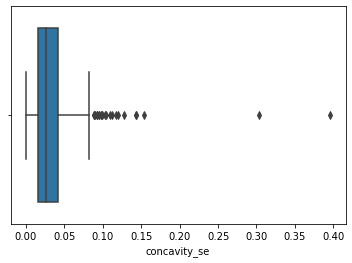

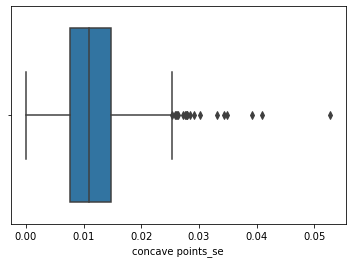

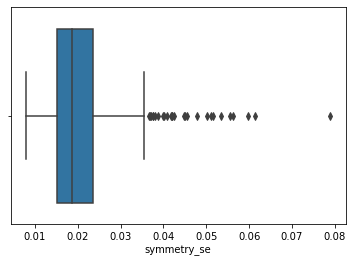

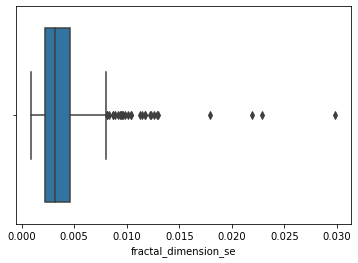

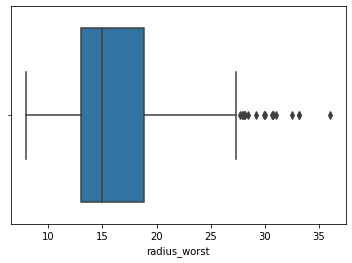

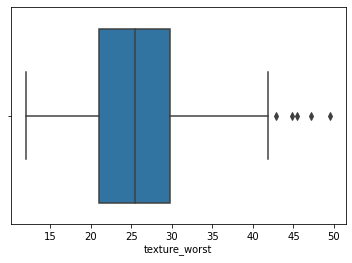

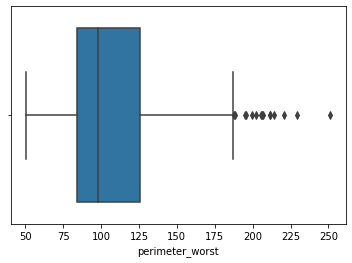

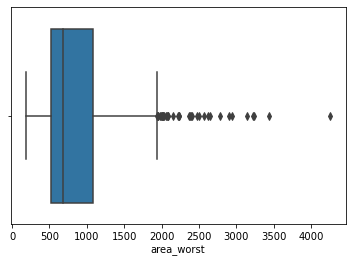

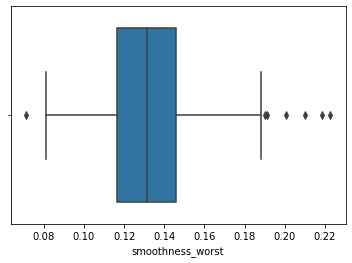

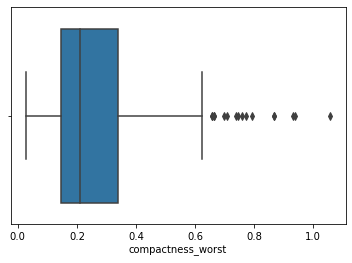

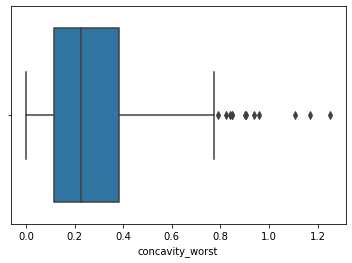

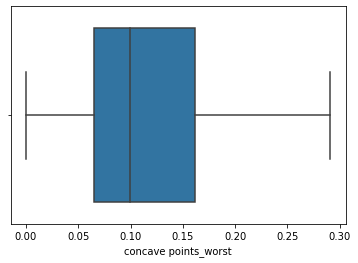

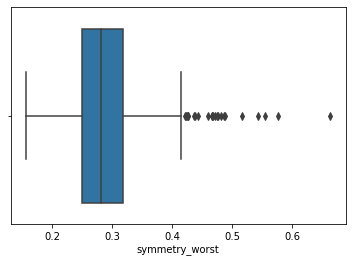

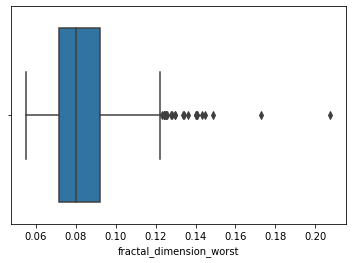

In [10]:
for i in X.columns:
    sns.boxplot(X[i])
    plt.show()

### Detecting outlier using Z score
Using Z score
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [11]:
from scipy.stats import zscore

In [12]:
upperThreshhold=3
lowerThreshhold=-3
for i in X.columns:
    X['ZZZ'+i]=np.abs(zscore(X[i]))
    X=X[(X['ZZZ'+i] < upperThreshhold) & (X['ZZZ'+i] > lowerThreshhold) ]
    #X.drop(X['ZZZ'+i],axis=1,inplace=True)

In [13]:
unwanted = X.columns[X.columns.str.startswith('ZZZ')]
X.drop(unwanted, axis=1, inplace=True)
X.shape

(427, 30)

In [14]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


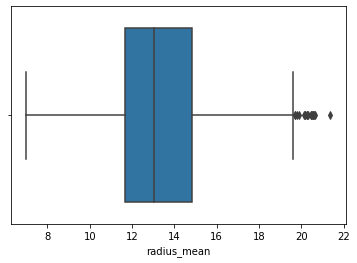

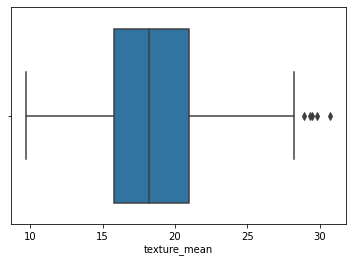

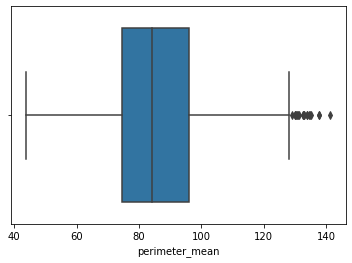

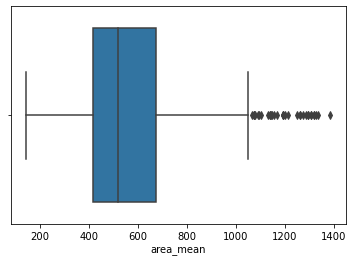

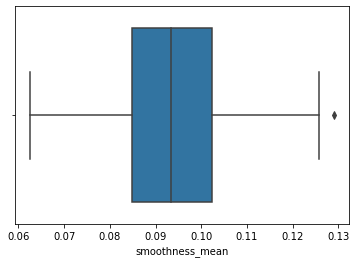

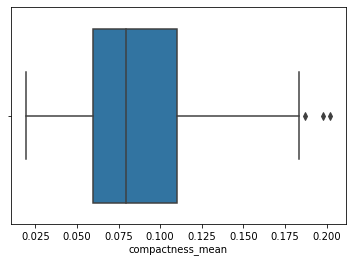

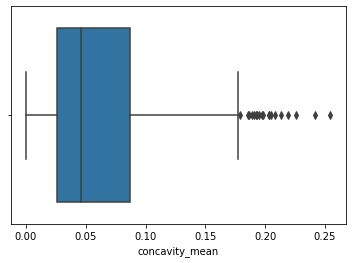

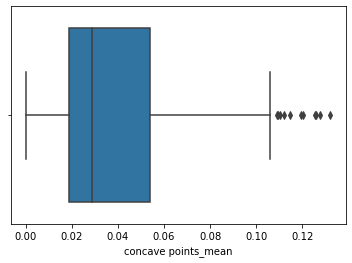

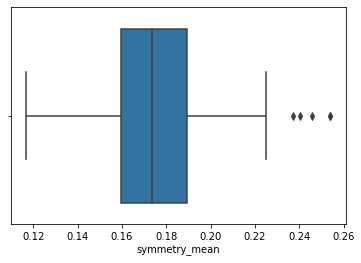

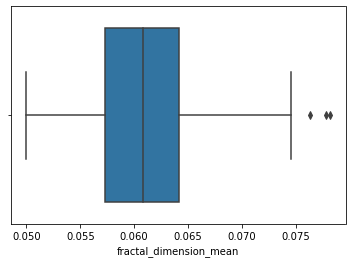

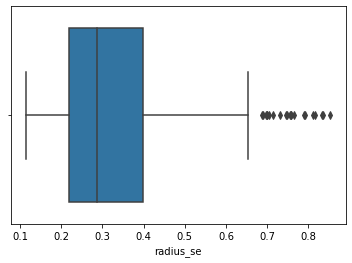

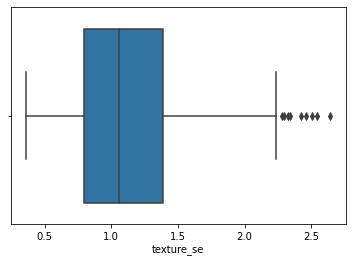

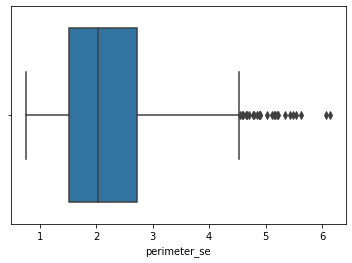

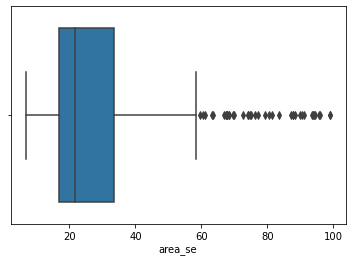

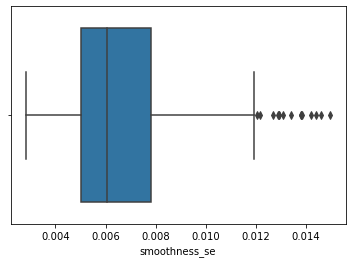

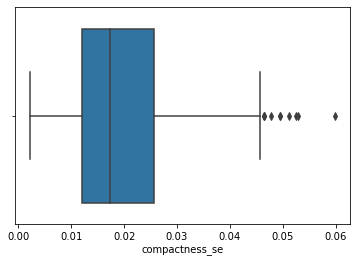

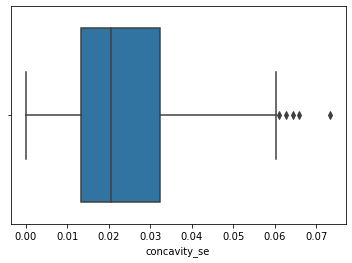

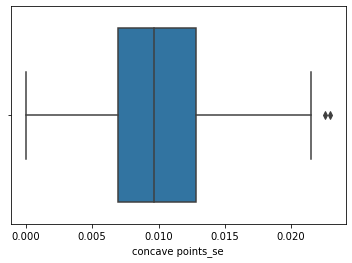

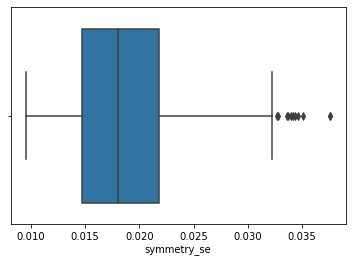

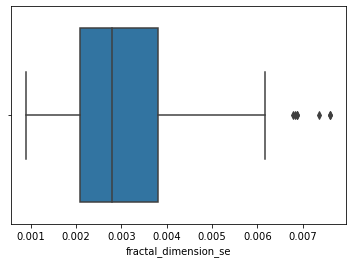

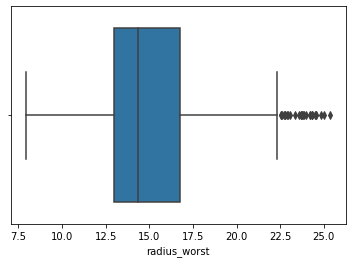

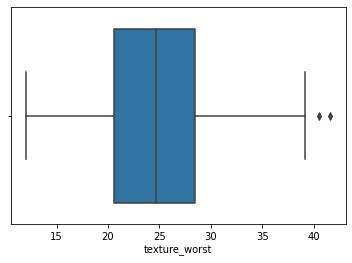

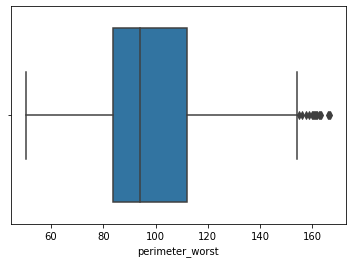

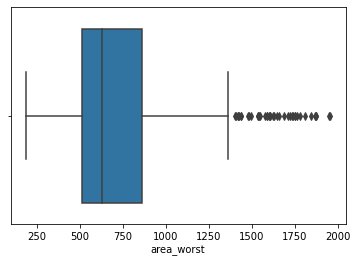

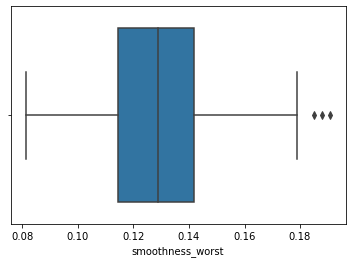

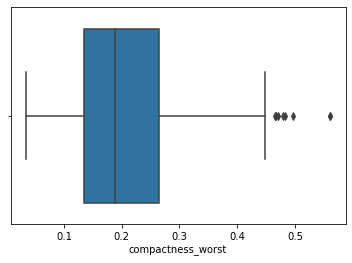

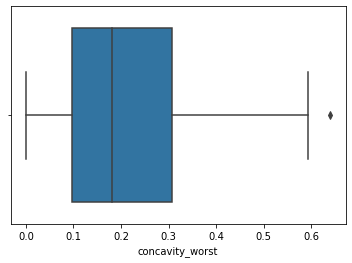

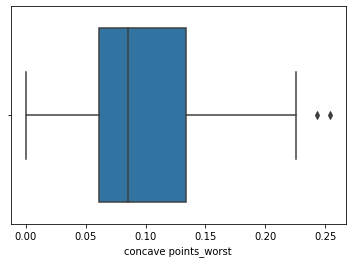

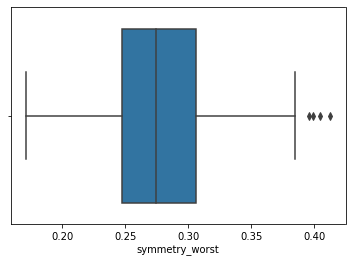

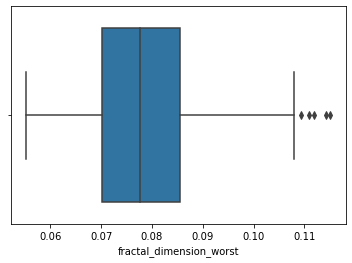

In [15]:
for i in X.columns:
    sns.boxplot(X[i])
    plt.show()

### Remove Outlier Using IQR

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
y=df.iloc[:,0]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [18]:
X=df.iloc[:,1:]
y=df.iloc[:,0]
y = y.map({'B':0,'M':1})

In [19]:
## Remove Right Side Outlier
for col in X.columns:
    print(col)
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    #IQR = X[col].quantile(0.75)-X[col].quantile(0.25)
    IQR = Q3-Q1
    print(IQR)
    upper_bridge = Q3+(IQR*1.5)
    lower_bridge = Q1-(IQR*1.5)
    print(upper_bridge,lower_bridge)
    X.loc[X[col]>=upper_bridge, col]=upper_bridge
    print('========')

radius_mean
4.08
21.9 5.579999999999999
texture_mean
5.629999999999999
30.244999999999997 7.725000000000003
perimeter_mean
28.929999999999993
147.49499999999998 31.775000000000013
area_mean
362.40000000000003
1326.3000000000002 -123.30000000000001
smoothness_mean
0.018930000000000002
0.133695 0.057975
compactness_mean
0.06547999999999998
0.22861999999999996 -0.03329999999999997
concavity_mean
0.10114000000000001
0.28241000000000005 -0.12215000000000001
concave points_mean
0.053690000000000015
0.15453500000000003 -0.06022500000000003
symmetry_mean
0.033800000000000024
0.24640000000000006 0.11119999999999995
fractal_dimension_mean
0.008419999999999997
0.07874999999999999 0.045070000000000006
radius_se
0.2465
0.84865 -0.13735000000000003
texture_se
0.6401
2.43415 -0.12625000000000008
perimeter_se
1.751
5.983499999999999 -1.0205000000000002
area_se
27.339999999999996
86.19999999999999 -23.15999999999999
smoothness_se
0.0029769999999999987
0.012611499999999998 0.0007035000000000019
compactn

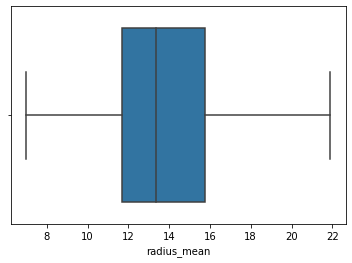

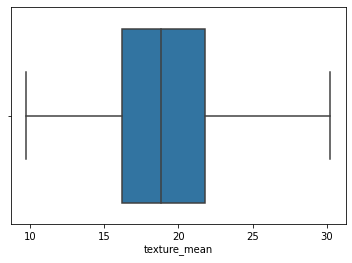

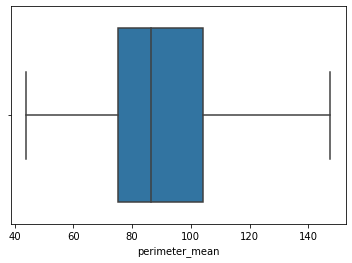

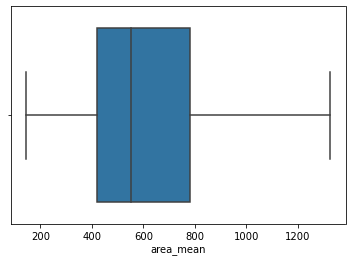

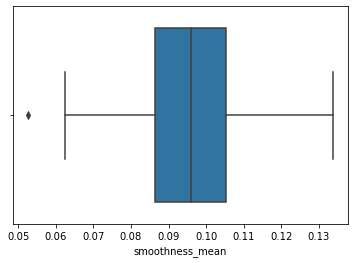

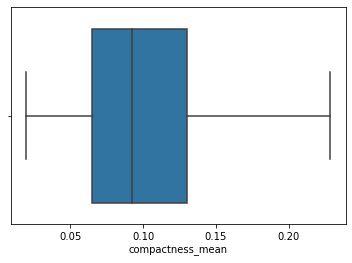

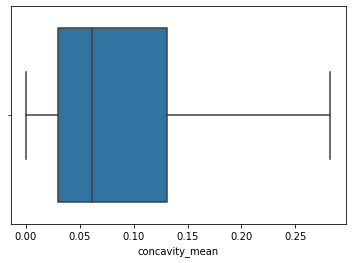

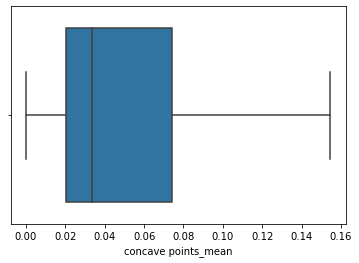

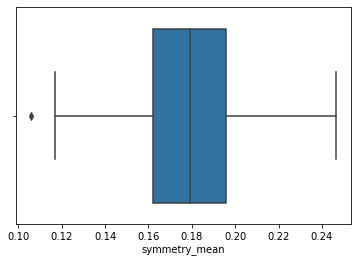

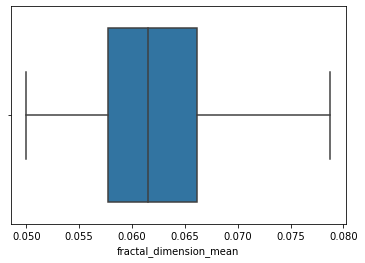

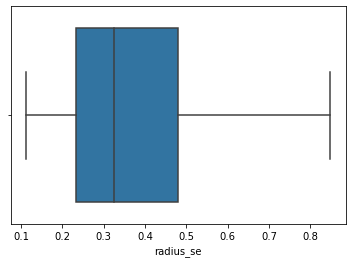

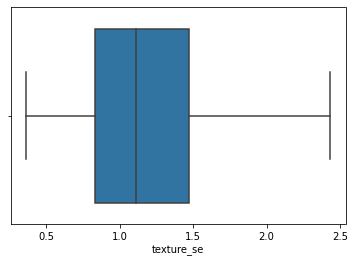

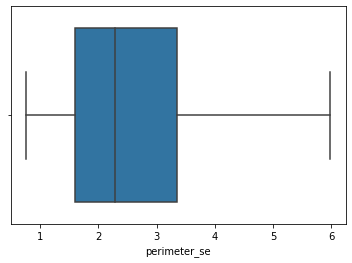

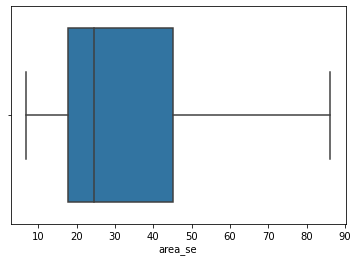

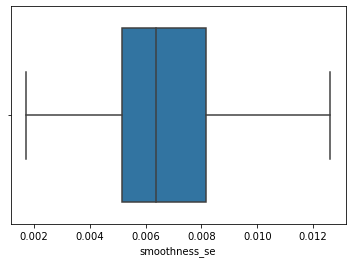

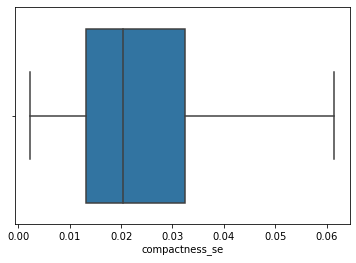

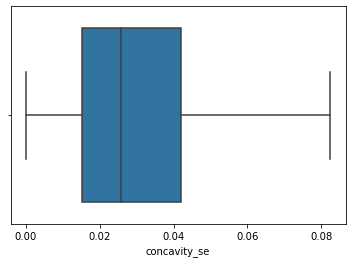

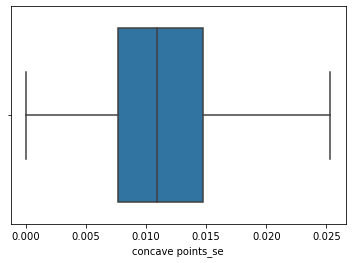

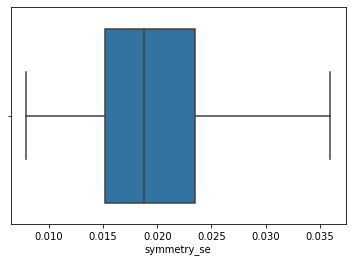

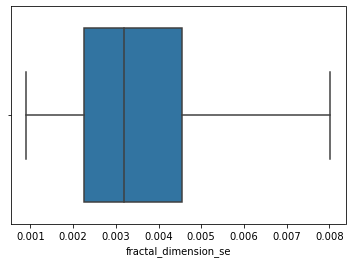

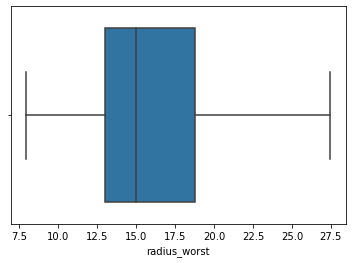

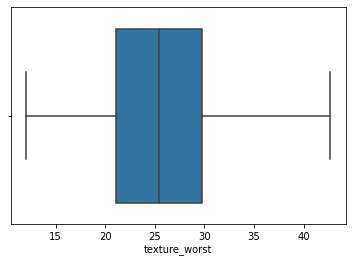

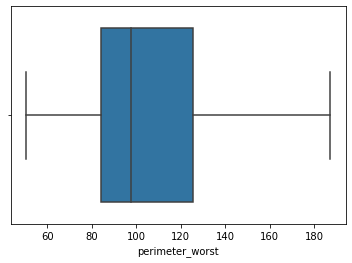

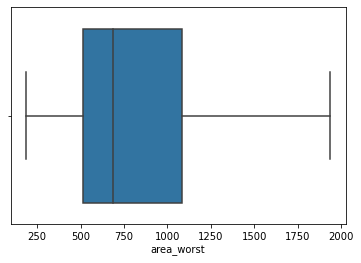

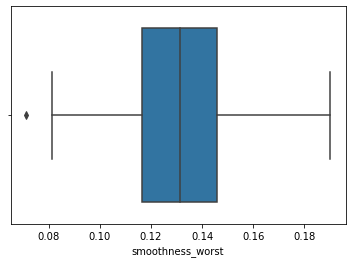

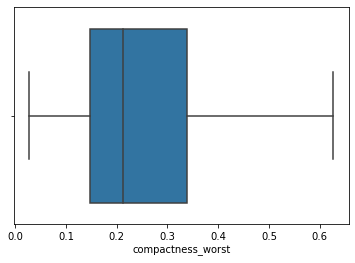

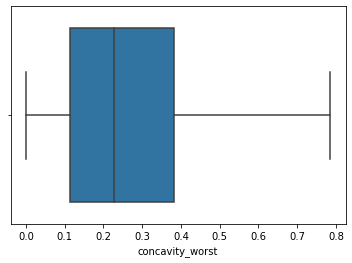

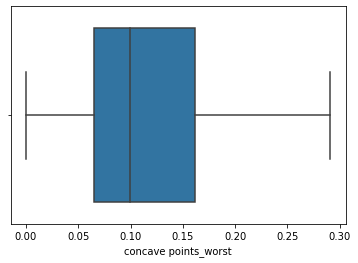

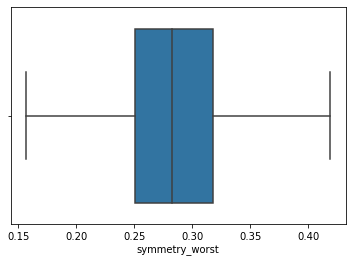

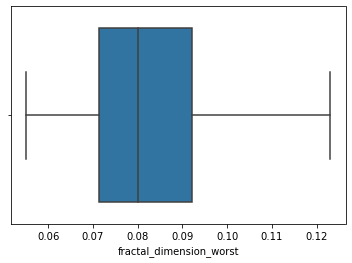

In [20]:
for i in X.columns:
    sns.boxplot(X[i])
    plt.show()

In [21]:
X.shape

(569, 30)

In [22]:
## Remove left Side Outlier
for col in X.columns:
    print(col)
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    #IQR = X[col].quantile(0.75)-X[col].quantile(0.25)
    IQR = Q3-Q1
    print(IQR)
    upper_bridge = Q3+(IQR*1.5)
    lower_bridge = Q1-(IQR*1.5)
    print(upper_bridge,lower_bridge)
    X.loc[X[col] < lower_bridge, col]=lower_bridge
    print('========')

radius_mean
4.08
21.9 5.579999999999999
texture_mean
5.629999999999999
30.244999999999997 7.725000000000003
perimeter_mean
28.929999999999993
147.49499999999998 31.775000000000013
area_mean
362.40000000000003
1326.3000000000002 -123.30000000000001
smoothness_mean
0.018930000000000002
0.133695 0.057975
compactness_mean
0.06547999999999998
0.22861999999999996 -0.03329999999999997
concavity_mean
0.10114000000000001
0.28241000000000005 -0.12215000000000001
concave points_mean
0.053690000000000015
0.15453500000000003 -0.06022500000000003
symmetry_mean
0.033800000000000024
0.24640000000000006 0.11119999999999995
fractal_dimension_mean
0.008419999999999997
0.07874999999999999 0.045070000000000006
radius_se
0.2465
0.84865 -0.13735000000000003
texture_se
0.6401
2.43415 -0.12625000000000008
perimeter_se
1.751
5.983499999999999 -1.0205000000000002
area_se
27.339999999999996
86.19999999999999 -23.15999999999999
smoothness_se
0.0029769999999999987
0.012611499999999998 0.0007035000000000019
compactn

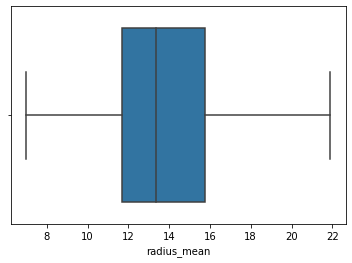

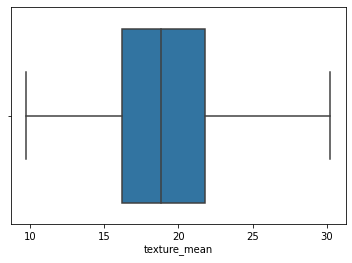

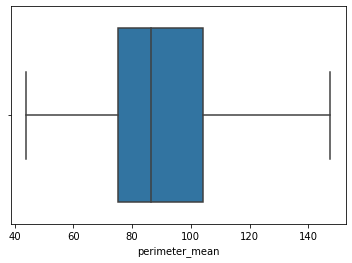

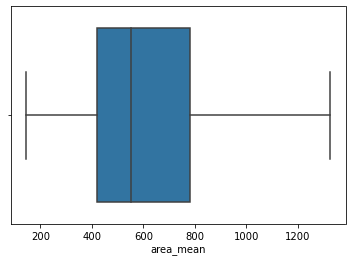

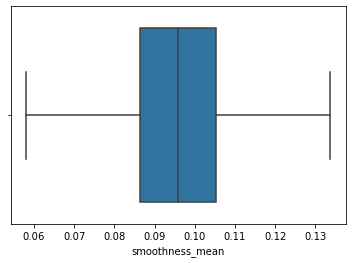

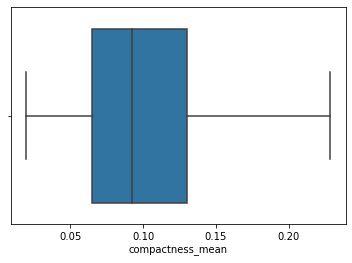

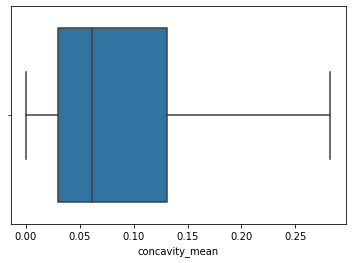

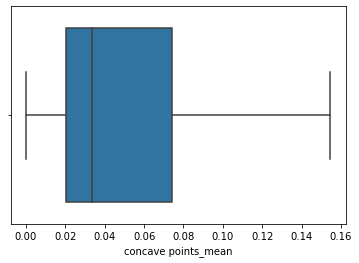

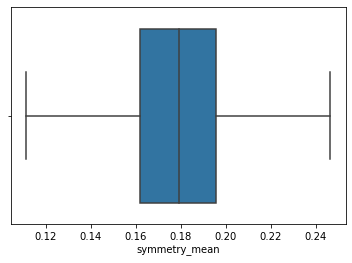

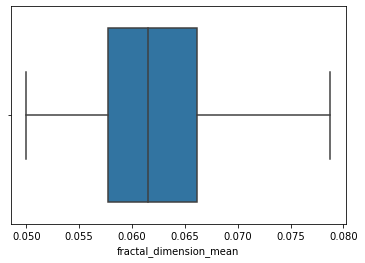

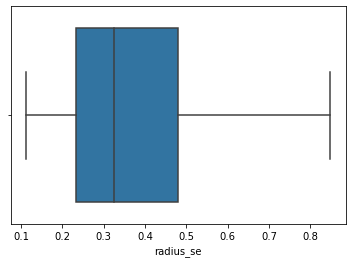

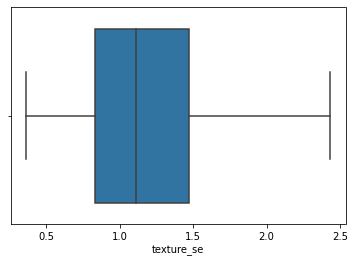

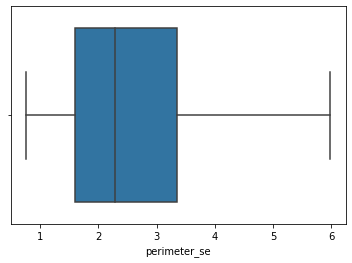

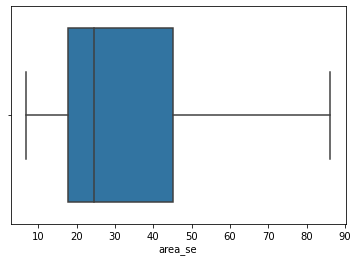

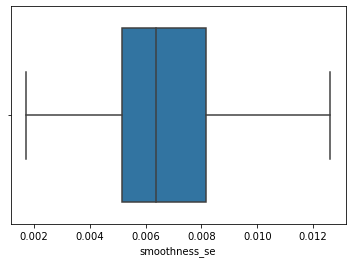

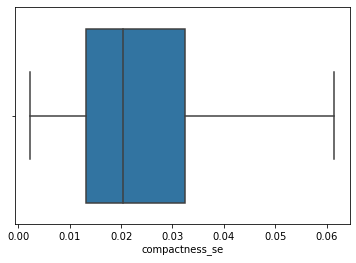

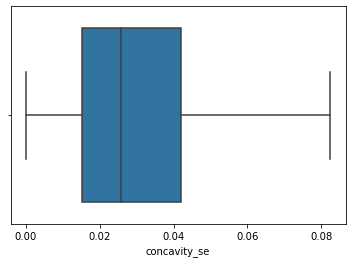

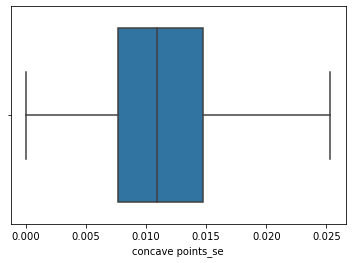

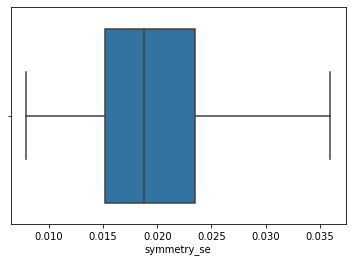

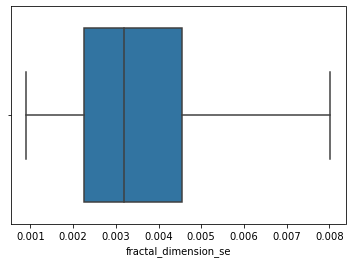

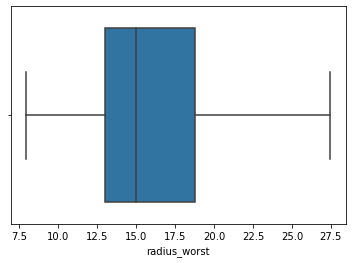

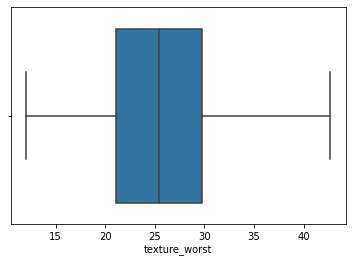

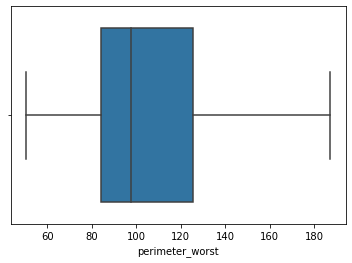

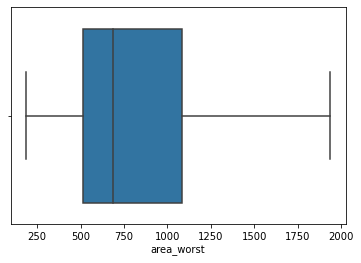

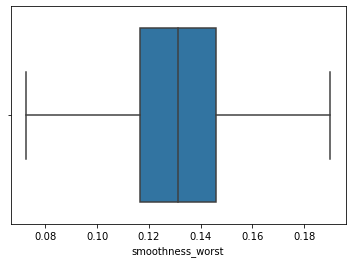

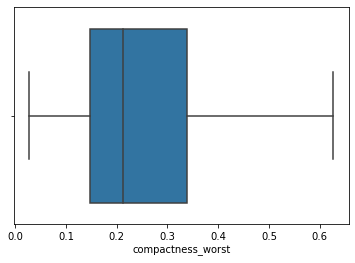

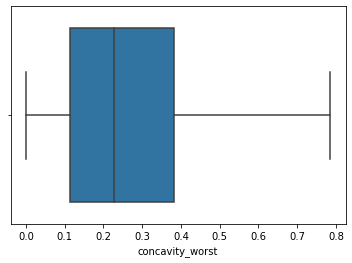

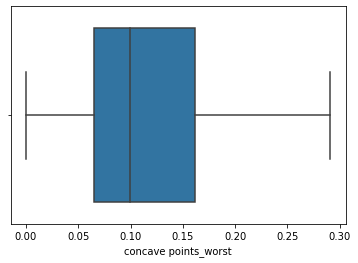

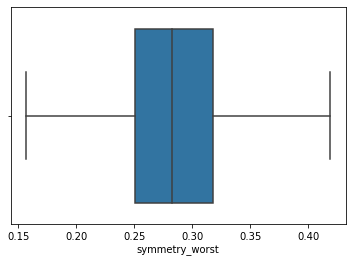

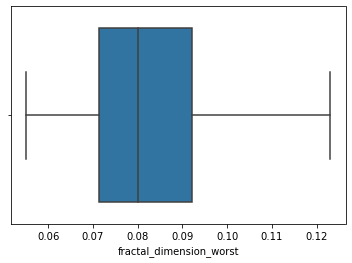

In [23]:
for i in X.columns:
    sns.boxplot(X[i])
    plt.show()

### independent features effects the Target Variable

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

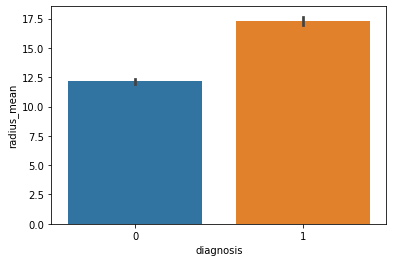

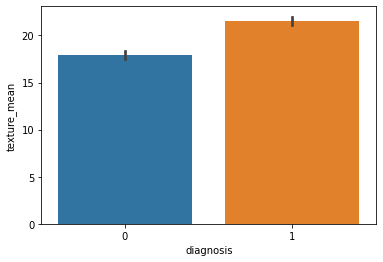

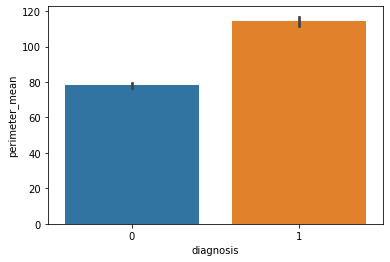

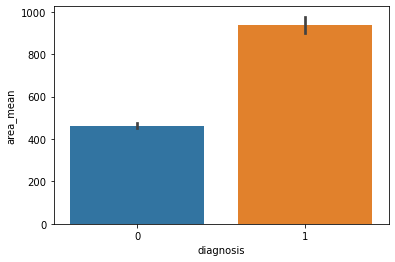

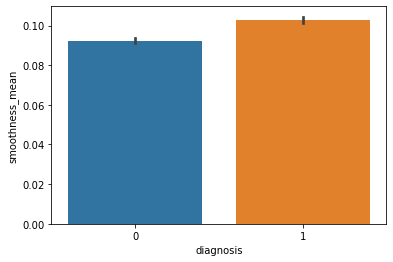

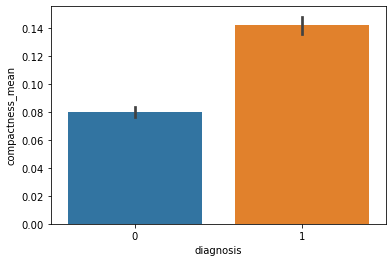

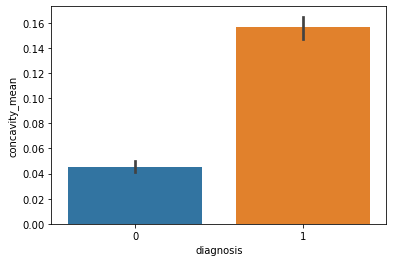

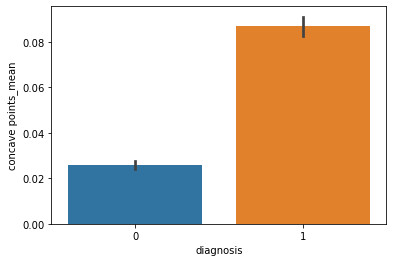

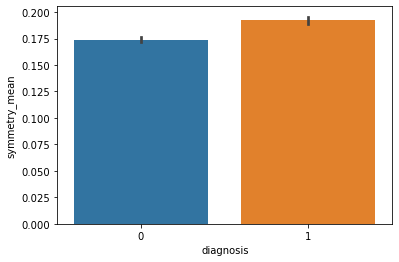

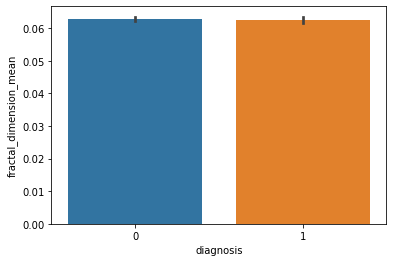

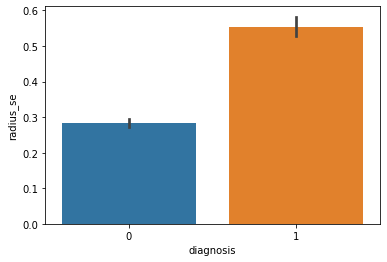

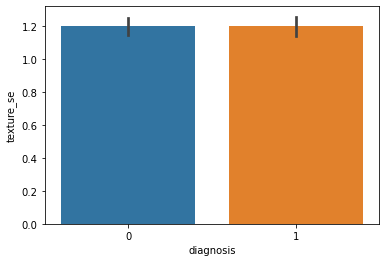

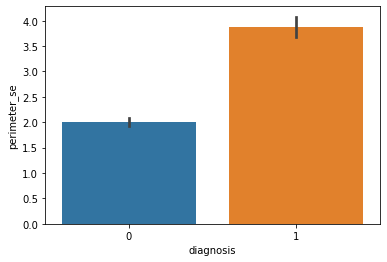

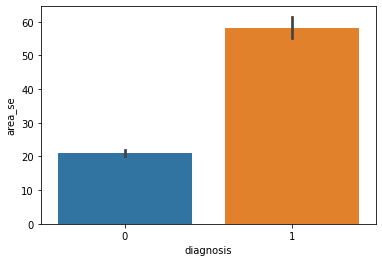

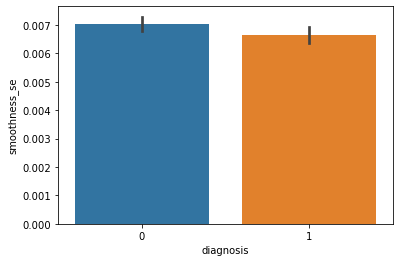

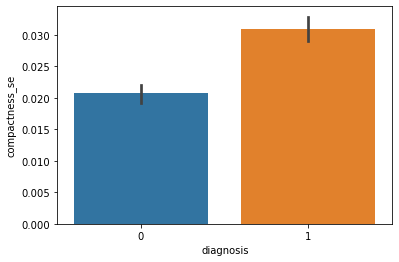

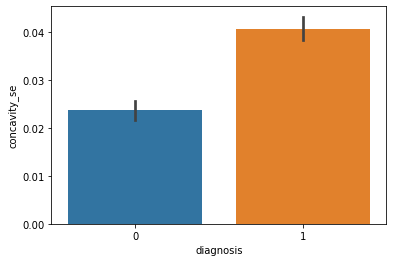

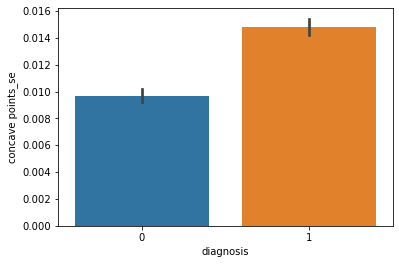

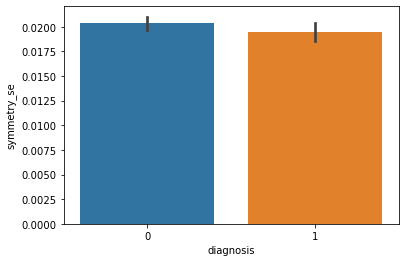

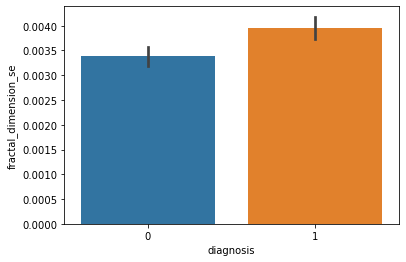

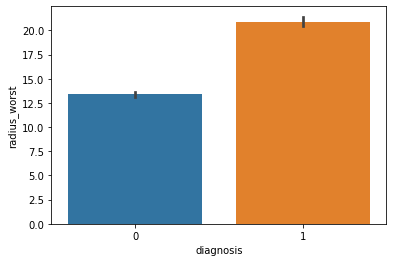

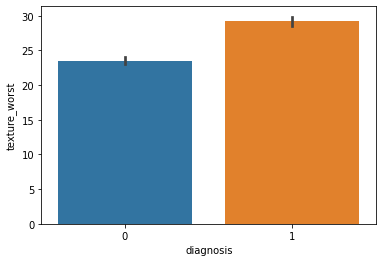

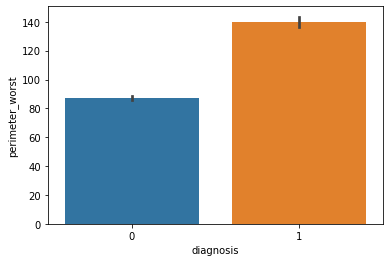

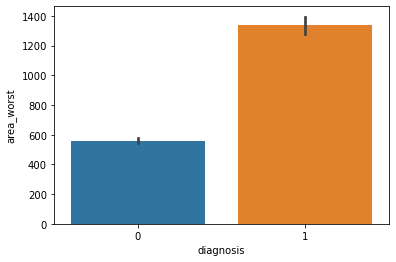

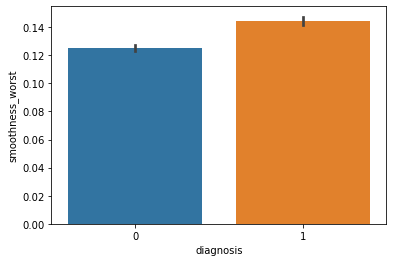

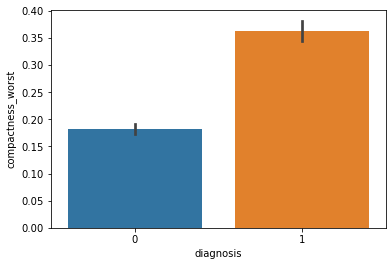

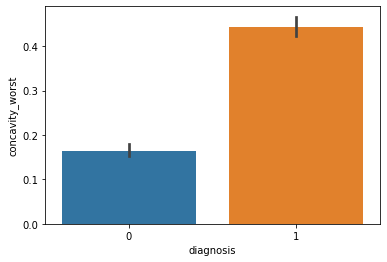

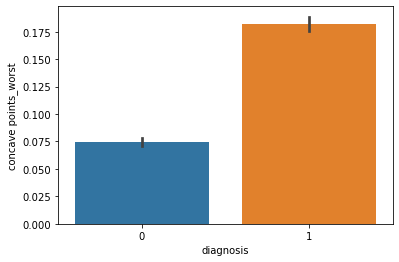

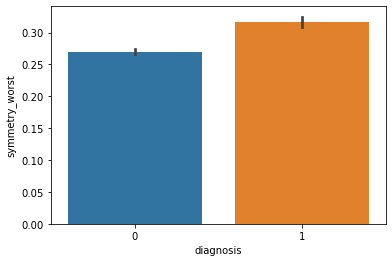

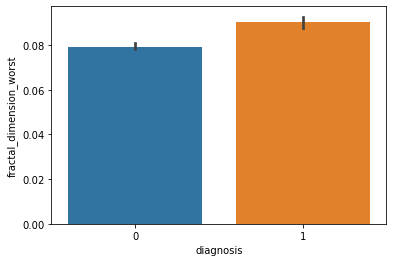

In [25]:
for i in X.columns:
    sns.barplot(y, X[i])
    plt.show()

### train test split

In [56]:
from sklearn.model_selection import train_test_split
# 80 20
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
# 70 30
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)
# 75 25
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
# 90 10
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=12)

## Model Building
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XgBoost
5. SVC
6. KNN

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

In [59]:
# Logistic Regression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
print('training score ',classifier.score(X_train,y_train))
y_pred=classifier.predict(X_test)
print('testing score ',accuracy_score(y_test,y_pred))
print('confusion_matrix ',confusion_matrix(y_test,y_pred))
print('classification_report ',classification_report(y_test,y_pred))
print('roc_curve ',roc_curve(y_test,y_pred))
print('roc_auc_score ',roc_auc_score(y_test,y_pred))

training score  0.94921875
testing score  0.9298245614035088
confusion_matrix  [[33  0]
 [ 4 20]]
classification_report                precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.83      0.91        24

    accuracy                           0.93        57
   macro avg       0.95      0.92      0.93        57
weighted avg       0.94      0.93      0.93        57

roc_curve  (array([0., 0., 1.]), array([0.        , 0.83333333, 1.        ]), array([2, 1, 0], dtype=int64))
roc_auc_score  0.9166666666666667


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Decision Tree
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print('training score ',classifier.score(X_train,y_train))
y_pred=classifier.predict(X_test)
print('testing score ',accuracy_score(y_test,y_pred))
print('confusion_matrix ',confusion_matrix(y_test,y_pred))
print('classification_report ',classification_report(y_test,y_pred))
print('roc_curve ',roc_curve(y_test,y_pred))
print('roc_auc_score ',roc_auc_score(y_test,y_pred))

training score  1.0
testing score  0.9298245614035088
confusion_matrix  [[32  1]
 [ 3 21]]
classification_report                precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.88      0.91        24

    accuracy                           0.93        57
   macro avg       0.93      0.92      0.93        57
weighted avg       0.93      0.93      0.93        57

roc_curve  (array([0.        , 0.03030303, 1.        ]), array([0.   , 0.875, 1.   ]), array([2, 1, 0], dtype=int64))
roc_auc_score  0.922348484848485


In [61]:
# Random Forest
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
print('training score ',classifier.score(X_train,y_train))
y_pred=classifier.predict(X_test)
print('testing score ',accuracy_score(y_test,y_pred))
print('confusion_matrix ',confusion_matrix(y_test,y_pred))
print('classification_report ',classification_report(y_test,y_pred))
print('roc_curve ',roc_curve(y_test,y_pred))
print('roc_auc_score ',roc_auc_score(y_test,y_pred))

training score  1.0
testing score  0.9649122807017544
confusion_matrix  [[33  0]
 [ 2 22]]
classification_report                precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        24

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57

roc_curve  (array([0., 0., 1.]), array([0.        , 0.91666667, 1.        ]), array([2, 1, 0], dtype=int64))
roc_auc_score  0.9583333333333333


In [62]:
# XG Boost
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
print('training score ',classifier.score(X_train,y_train))
y_pred=classifier.predict(X_test)
print('testing score ',accuracy_score(y_test,y_pred))
print('confusion_matrix ',confusion_matrix(y_test,y_pred))
print('classification_report ',classification_report(y_test,y_pred))
print('roc_curve ',roc_curve(y_test,y_pred))
print('roc_auc_score ',roc_auc_score(y_test,y_pred))

[12:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vivek\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


training score  1.0
testing score  0.9649122807017544
confusion_matrix  [[33  0]
 [ 2 22]]
classification_report                precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        24

    accuracy                           0.96        57
   macro avg       0.97      0.96      0.96        57
weighted avg       0.97      0.96      0.96        57

roc_curve  (array([0., 0., 1.]), array([0.        , 0.91666667, 1.        ]), array([2, 1, 0], dtype=int64))
roc_auc_score  0.9583333333333333


In [63]:
# SVC
classifier=SVC()
classifier.fit(X_train,y_train)
print('training score ',classifier.score(X_train,y_train))
y_pred=classifier.predict(X_test)
print('testing score ',accuracy_score(y_test,y_pred))
print('confusion_matrix ',confusion_matrix(y_test,y_pred))
print('classification_report ',classification_report(y_test,y_pred))
print('roc_curve ',roc_curve(y_test,y_pred))
print('roc_auc_score ',roc_auc_score(y_test,y_pred))

training score  0.923828125
testing score  0.8947368421052632
confusion_matrix  [[33  0]
 [ 6 18]]
classification_report                precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.75      0.86        24

    accuracy                           0.89        57
   macro avg       0.92      0.88      0.89        57
weighted avg       0.91      0.89      0.89        57

roc_curve  (array([0., 0., 1.]), array([0.  , 0.75, 1.  ]), array([2, 1, 0], dtype=int64))
roc_auc_score  0.875


In [64]:
# KNN
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
print('training score ',classifier.score(X_train,y_train))
y_pred=classifier.predict(X_test)
print('testing score ',accuracy_score(y_test,y_pred))
print('confusion_matrix ',confusion_matrix(y_test,y_pred))
print('classification_report ',classification_report(y_test,y_pred))
print('roc_curve ',roc_curve(y_test,y_pred))
print('roc_auc_score ',roc_auc_score(y_test,y_pred))

training score  0.953125
testing score  0.9122807017543859
confusion_matrix  [[33  0]
 [ 5 19]]
classification_report                precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.79      0.88        24

    accuracy                           0.91        57
   macro avg       0.93      0.90      0.91        57
weighted avg       0.92      0.91      0.91        57

roc_curve  (array([0., 0., 1.]), array([0.        , 0.79166667, 1.        ]), array([2, 1, 0], dtype=int64))
roc_auc_score  0.8958333333333333
